# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pickle
import math
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report ,accuracy_score , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Data Wrangling

## 1. Get dataset tanaman

In [2]:
df = pd.read_csv("../Dataset/rekomendasi_tanaman.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,padi
1,85,58,41,21.770462,80.319644,7.038096,226.655537,padi
2,60,55,44,23.004459,82.320763,7.840207,263.964248,padi
3,74,35,40,26.491096,80.158363,6.980401,242.864034,padi
4,78,42,42,20.130175,81.604873,7.628473,262.717340,padi


## 2. Penilaian Dataset Tanaman

In [3]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,49.225714,53.672381,48.537619,25.647571,71.093299,6.456942,100.067030
std,37.194613,33.695004,51.803317,5.174487,22.683467,0.784002,53.848519
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,20.000000,27.000000,20.000000,22.602437,59.237124,5.948298,63.489314
50%,36.000000,52.000000,30.000000,25.667383,80.532760,6.414227,91.978786
75%,84.000000,69.000000,50.000000,28.684566,90.194600,6.910487,117.368990
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2100 non-null   int64  
 1   P            2100 non-null   int64  
 2   K            2100 non-null   int64  
 3   temperature  2100 non-null   float64
 4   humidity     2100 non-null   float64
 5   ph           2100 non-null   float64
 6   rainfall     2100 non-null   float64
 7   label        2100 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 131.4+ KB


In [5]:
df['label'].value_counts()

label
padi              100
jagung            100
buncis            100
kacang merah      100
kacang polong     100
kacang panjang    100
kacang hijau      100
lentil hitam      100
lentil            100
delima            100
pisang            100
mangga            100
anggur            100
semangka          100
melon             100
apel              100
jeruk             100
pepaya            100
kelapa            100
kapas             100
kopi              100
Name: count, dtype: int64

In [6]:
# encoding
label_mapping = {
    'padi': 0,
    'jagung': 1,
    'buncis': 2,
    'kacang merah': 3,
    'kacang polong': 4,
    'kacang panjang': 5,
    'kacang hijau': 6,
    'lentil hitam': 7,
    'lentil': 8,
    'delima': 9,
    'pisang': 10,
    'mangga': 11,
    'anggur': 12,
    'semangka': 13,
    'melon' : 14,
    'apel': 15,
    'jeruk': 16,
    'pepaya': 17,
    'kelapa': 18,
    'kapas': 19,
    'kopi' : 20
}

df['encoding'] = df['label'].map(label_mapping)
df

,N,P,K,temperature,humidity,ph,rainfall,label,encoding
0,90,42,43,20.879744,82.002744,6.502985,202.935536,padi,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,padi,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,padi,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,padi,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,padi,0
...,...,...,...,...,...,...,...,...,...
2095,107,34,32,26.774637,66.413269,6.780064,177.774507,kopi,20
2096,99,15,27,27.417112,56.636362,6.086922,127.924610,kopi,20
2097,118,33,30,24.131797,67.225123,6.362608,173.322839,kopi,20
2098,117,32,34,26.272418,52.127394,6.758793,127.175293,kopi,20


In [7]:
# Memperbarui kolom dengan nilai bulat ke atas
df['N'] = df['N'].apply(math.ceil).astype(int)
df['P'] = df['P'].apply(math.ceil).astype(int)
df['K'] = df['K'].apply(math.ceil).astype(int)
df['temperature'] = df['temperature'].apply(math.ceil).astype(int)
df['humidity'] = df['humidity'].apply(math.ceil).astype(int)
df['ph'] = df['ph'].apply(math.ceil).astype(int)
df['rainfall'] = df['rainfall'].apply(math.ceil).astype(int)
df.head(200)

,N,P,K,temperature,humidity,ph,rainfall,label,encoding
0,90,42,43,21,83,7,203,padi,0
1,85,58,41,22,81,8,227,padi,0
2,60,55,44,24,83,8,264,padi,0
3,74,35,40,27,81,7,243,padi,0
4,78,42,42,21,82,8,263,padi,0
...,...,...,...,...,...,...,...,...,...
195,90,57,24,19,73,7,83,jagung,1
196,67,35,22,24,64,7,109,jagung,1
197,60,54,19,19,63,7,71,jagung,1
198,83,58,23,20,60,7,66,jagung,1


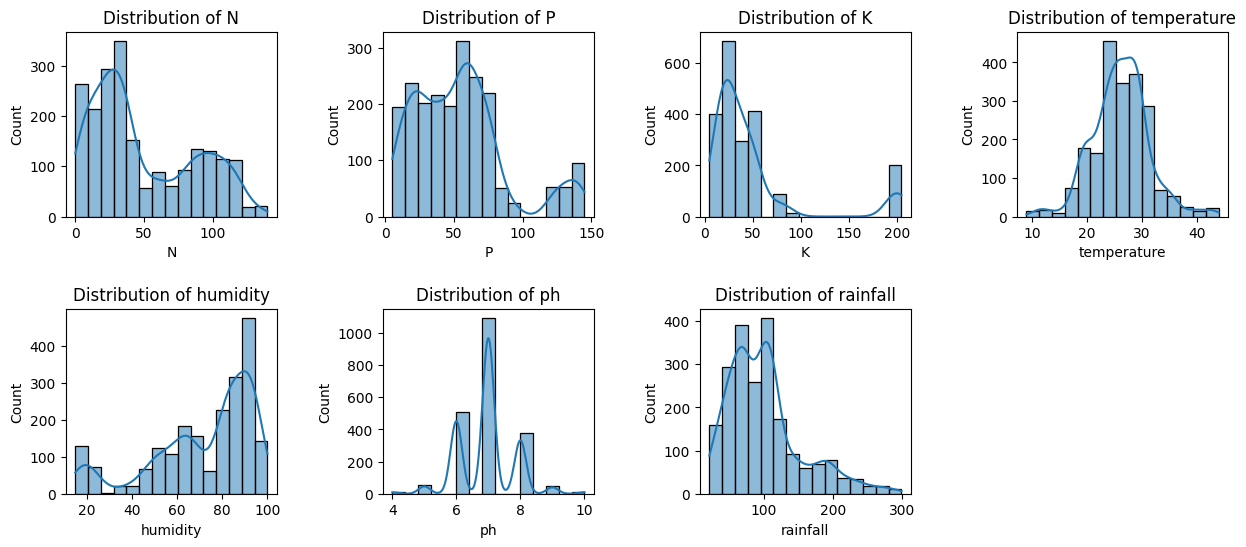

In [8]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['N','P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    n += 1
    plt.subplot(2, 4, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=15, kde=True)
    plt.title('Distribution of {}'.format(x))

plt.show()

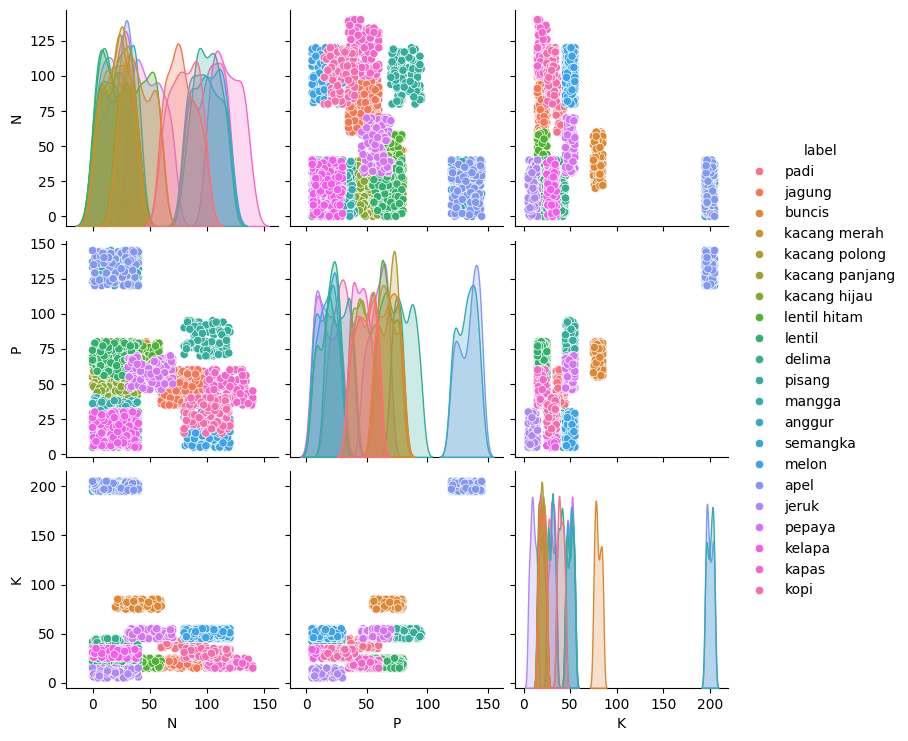

In [9]:
sns.pairplot(df, vars = ['N','P', 'K'], hue = "label")

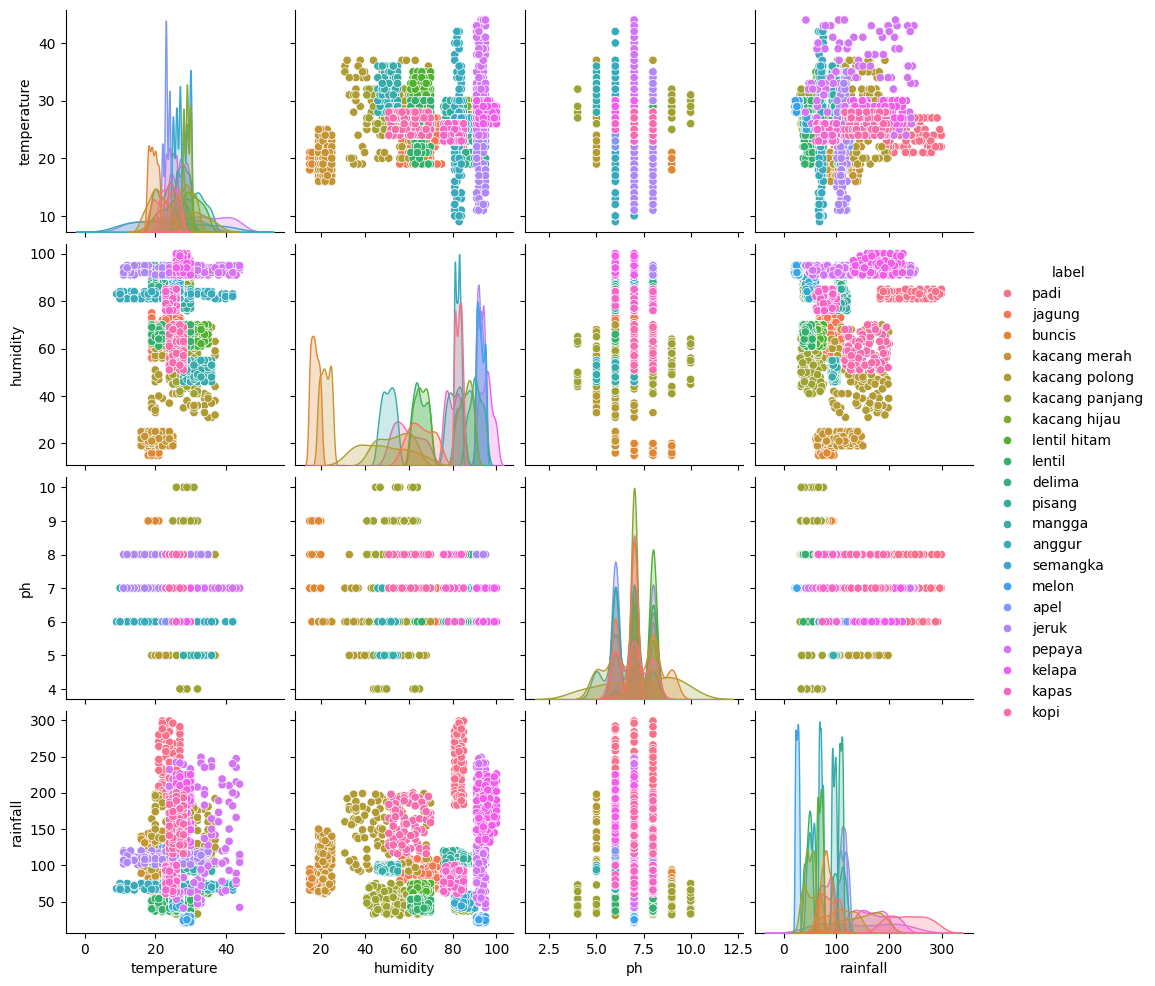

In [10]:
sns.pairplot(df, vars = ['temperature', 'humidity', 'ph', 'rainfall'], hue = "label")

## 3. Pembersihan Data Tanaman

In [11]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
encoding       0
dtype: int64

In [12]:
df.drop_duplicates()

,N,P,K,temperature,humidity,ph,rainfall,label,encoding
0,90,42,43,21,83,7,203,padi,0
1,85,58,41,22,81,8,227,padi,0
2,60,55,44,24,83,8,264,padi,0
3,74,35,40,27,81,7,243,padi,0
4,78,42,42,21,82,8,263,padi,0
...,...,...,...,...,...,...,...,...,...
2095,107,34,32,27,67,7,178,kopi,20
2096,99,15,27,28,57,7,128,kopi,20
2097,118,33,30,25,68,7,174,kopi,20
2098,117,32,34,27,53,7,128,kopi,20


In [13]:
# Menghapus kolom yang tidak digunakan
df_clean = df.copy()

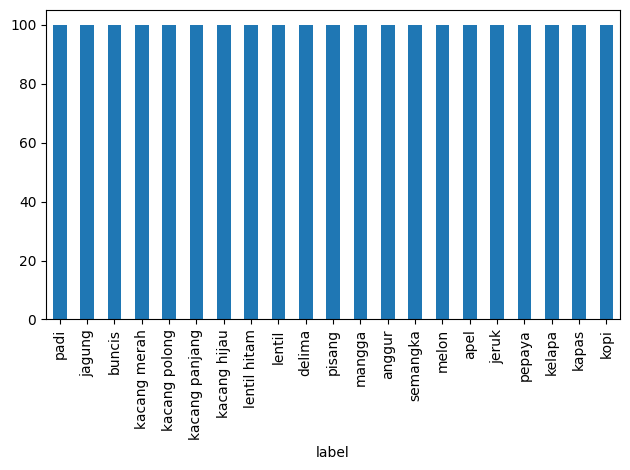

In [14]:
df_clean['label'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

In [15]:
df_clean.drop(['label'], axis=1, inplace= True)
df_clean.head()

,N,P,K,temperature,humidity,ph,rainfall,encoding
0,90,42,43,21,83,7,203,0
1,85,58,41,22,81,8,227,0
2,60,55,44,24,83,8,264,0
3,74,35,40,27,81,7,243,0
4,78,42,42,21,82,8,263,0


### Split Data Train dan Data Test

In [16]:
X = df_clean.drop(['encoding'], axis=1)
y = df_clean['encoding']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('training dataset:')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset:
(1680, 7)
(1680,)

testing dataset:
(420, 7)
(420,)


In [26]:
# Simpan dataset uji ke dalam file CSV agar 
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

### Model Random forest

In [18]:
model_randomForest = RandomForestClassifier()
model_randomForest.fit(X_train, y_train) 
ypred_randomForest = model_randomForest.predict(X_test)
print("clasification report: \n", classification_report(y_test, ypred_randomForest))
print('acuracy scorenya : ', accuracy_score(y_test, ypred_randomForest))

clasification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        24
           5       1.00      0.96      0.98        26
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        17
           8       0.95      1.00      0.97        18
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        17
   

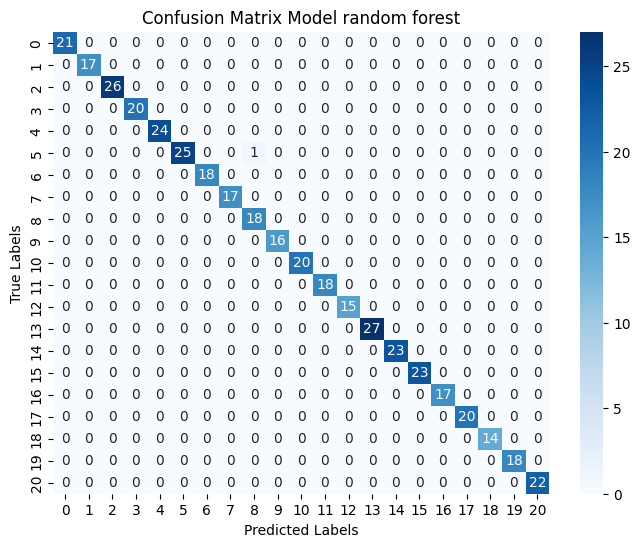

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, ypred_randomForest)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_randomForest.classes_, yticklabels=model_randomForest.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Model random forest')
plt.show()

### Model Decission Tree

In [20]:
model_decisionTree = DecisionTreeClassifier()
model_decisionTree.fit(X_train, y_train)
ypred_decisionTree = model_decisionTree.predict(X_test)
print("clasification report: \n", classification_report(y_test, ypred_decisionTree))
print('acuracy scorenya : ', accuracy_score(y_test, ypred_decisionTree))

clasification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      1.00      0.97        17
           2       1.00      0.96      0.98        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        24
           5       1.00      0.92      0.96        26
           6       1.00      1.00      1.00        18
           7       0.94      1.00      0.97        17
           8       0.95      1.00      0.97        18
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        17
   

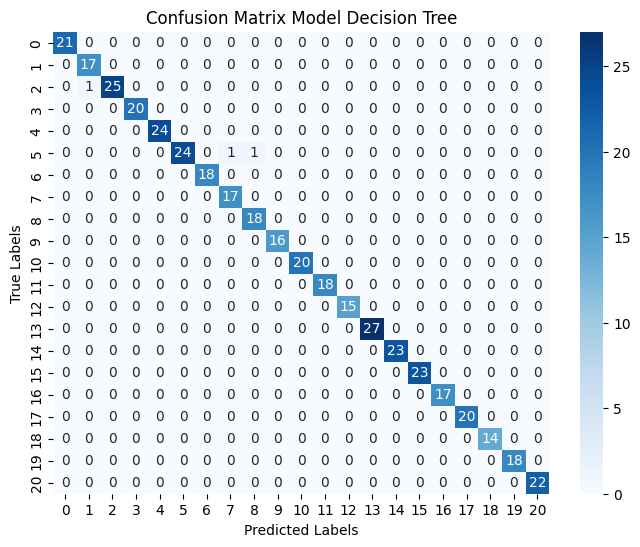

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, ypred_decisionTree)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_decisionTree.classes_, yticklabels=model_decisionTree.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Model Decision Tree')
plt.show()

### Model Naive Bayes

In [22]:
model_naiveBayes = GaussianNB()
model_naiveBayes.fit(X_train, y_train)
ypred_naiveBayes = model_naiveBayes.predict(X_test)
print("clasification report: \n", classification_report(y_test, ypred_naiveBayes))
print('acuracy scorenya : ', accuracy_score(y_test, ypred_naiveBayes))

clasification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        17
   

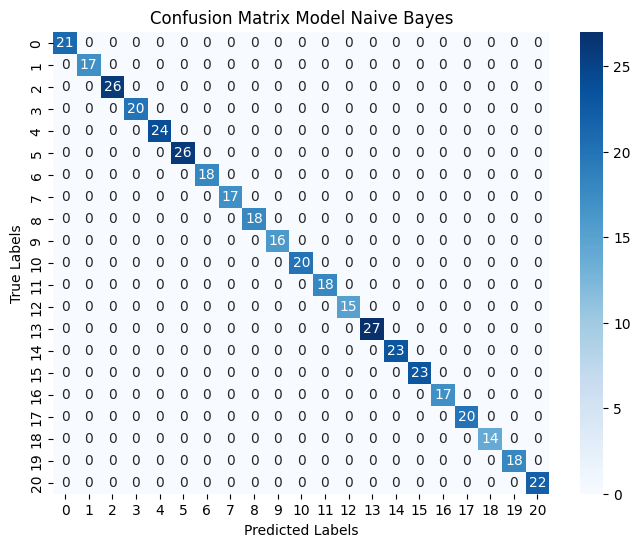

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, ypred_naiveBayes)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_naiveBayes.classes_, yticklabels=model_naiveBayes.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Model Naive Bayes')
plt.show()

## Deployment

In [24]:
# Dictionary untuk label tanaman
label_predict = {
    'padi': 0,
    'jagung': 1,
    'buncis': 2,
    'kacang merah': 3,
    'kacang polong': 4,
    'kacang panjang': 5,
    'kacang hijau': 6,
    'lentil hitam': 7,
    'lentil': 8,
    'delima': 9,
    'pisang': 10,
    'mangga': 11,
    'anggur': 12,
    'semangka': 13,
    'melon': 14,
    'apel': 15,
    'jeruk': 16,
    'pepaya': 17,
    'kelapa': 18,
    'kapas': 19,
    'kopi': 20
}

# Membalik dictionary untuk mempermudah pencarian nama berdasarkan angka
label_reverse = {v: k for k, v in label_predict.items()}

# Inputan yang diberikan
input_data = {
    'N': [0],
    'P': [19],
    'K': [33],
    'temperature': [28],
    'humidity': [96],
    'ph': [7],
    'rainfall': [305]
}

# Fungsi untuk memeriksa apakah input data kosong
def check_empty_input(data):
    for key, value in data.items():
        if not value or value[0] is None:
            print(f"Data untuk {key} tidak ada.")
            return False
    return True

# Fungsi untuk membulatkan input data ke atas
def round_input_data(data):
    rounded_data = {}
    for key, value in data.items():
        rounded_data[key] = [math.ceil(v) for v in value]
    return rounded_data

# Mengecek apakah input tidak kosong
if check_empty_input(input_data):
    rounded_data = round_input_data(input_data)
    
    # Konversi ke DataFrame
    new_data = pd.DataFrame(rounded_data)

    # Prediksi kelas menggunakan model Random Forest
    prediction = model_randomForest.predict(new_data)

    # Menampilkan hasil prediksi dalam bentuk label tanaman
    predicted_label = label_reverse[prediction[0]]
    print(f"Prediksi jenis tanaman yang tepat di tanam adalah jenis tanaman: {predicted_label} (label: {prediction[0]})")
else:
    print("Data input tidak lengkap. Tidak dapat melakukan prediksi.")


Prediksi jenis tanaman yang tepat di tanam adalah jenis tanaman: kelapa (label: 18)


In [25]:
pickle.dump(model_randomForest, open('model_RandomForest.pkl', 'wb'))